# Análisis del rendimiento de los estudiantes

Establecemos las siguientes preguntas a resolver 
1. ¿Qué variables son determinantes o tienen un alto impacto en las calificaciones?
2. ¿El consumo de alcohol por parte de los estudiantes afecta en la relación con su familia?
3. La dirección del hogar del estudiante (rural o urbana) ¿afecta en el rendimiento de los estudiantes? (actividades extracurriculares, tiempo libre, etc.)


## Conjunto de datos

Primero importaremos las librerías a utilizar así como nuestro conjunto de datos

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [87]:
data = pd.read_csv('student-por.csv',sep=';')

Información sobre el conjunto de datos:

1. `school` - Escuela del estudiante (binario: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)
2. `sex` - Sexo del estudiante (binario: 'F' - mujer o 'M' - hombre)
3. `age` - Edad del estudiante (numérica: de 15 a 22)
4. `address` - Tipo de dirección del hogar del estudiante (binario: 'U' - urbano o 'R' - rural)
5. `famsize` - Tamaño de la familia (binario: 'LE3' - menor o igual a 3 o 'GT3' - mayor que 3)
6. `Pstatus` - Estado de convivencia de los padres (binario: 'T' - vivir juntos o 'A' - aparte)
7. `Medu` - Educación de la madre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2 - 5º a 9º grado, 3 - educación secundaria, 4 - educación superior)
8. `Fedu` - Educación del padre (numérico: 0 - ninguno, 1 - educación primaria (4º grado), 2º - 5º a 9º grado, 3º - educación secundaria, 4º - educación superior)
9. `Mjob`- Trabajo de la madre (nominal: 'maestro', 'salud' relacionado, 'servicios' civiles (por ejemplo, administrativo o policial), 'at_home' u 'otro')
10. `Fjob` - Trabajo del padre (nominal: 'maestro', 'salud' relacionado, 'servicios' civiles (por ejemplo, administrativo o policial), 'at_home' u 'otro')
11. `reason` - Razón para elegir esta escuela (nominal: cerca de 'casa', 'reputación' de la escuela, preferencia de 'curso' u 'otro')
12. `guardian` - Tutor del estudiante (nominal: 'madre', 'padre' u 'otro')
13. `traveltime` - Tiempo de viaje de casa a la escuela (numérico: 1 - < 15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, o 4 - >1 hora)
14. `studytime` - Tiempo de estudio semanal (numérico: 1 - < 2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)
15. `failures` - Número de fracasos de clases anteriores (numérico: n si 1< = n < 3, de lo contrario 4)
16. `schoolsup` - Apoyo educativo adicional (binario: sí o no)
17. `famsup` - Apoyo educativo familiar (binario: sí o no)
18. `paid` - Clases extra pagadas dentro de la asignatura del curso (Matemáticas o Portugués) (binario: sí o no)
19. `activities` - Actividades extracurriculares (binario: sí o no)
20. `nursery` - Asistió a la guardería (binario: sí o no)
21. `higher` - Quiere tomar educación superior (binario: sí o no)
22. `internet` - Acceso a Internet en casa (binario: sí o no)
23. `romantic` - Con una relación romántica (binario: sí o no)
24. `famrel` - Calidad de las relaciones familiares (numérica: de 1 - muy malo a 5 - excelente)
25. `freetime` - Tiempo libre después de la escuela (numérico: de 1 - muy bajo a 5 - muy alto)
26. `goout` (numérico: de 1 - muy bajo a 5 - muy alto)
27. `Dalc` - Consumo de alcohol en la jornada laboral (numérico: de 1 - muy bajo a 5 - muy alto)
28. `Walc` - Consumo de alcohol de fin de semana (numérico: de 1 - muy bajo a 5 - muy alto)
29. `health` - Estado de salud actual (numérico: de 1 - muy malo a 5 - muy bueno)
30. `absences` - Número de ausencias escolares (numérico: de 0 a 93)

Los siguientes grados están relacionados con la asignatura del curso, Matemáticas o Portugués:
31. `G1` - Nota del Primer periodo(numérico: de 0 a 20)
31. `G2` - Nota del Segundo periodo (numérico: de 0 a 20)
32. `G3` - Nota final (numérica: de 0 a 20, objetivo de salida)

In [88]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Procesamiento y limpieza de datos

Ahora revisamos nuestro conjunto de datos para limpiarlos en caso de ser necesario

In [89]:
#Revisamos los valores únicos para cada variable
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [90]:
#Revisamos la cantidad de datos para cada columna así como la cantidad de celdas nulas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [91]:
#Revisamos diversos datos para cada columna, como el rango de valores, la cantidad de filas, etc
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Podemos corroborar que no hay necesidad de limpiar nuestro conjunto, pues los valores máximos, mínimo, únicos, etc. concuerdan con el rango de valores establecidos al principio para cada variable, así como que no existen valores nulos en nuestro conjunto.



---



## Análisis

### **Pregunta 1**
¿Qué variables son determinantes o tienen un alto impacto en las calificaciones?


Para agilizar el proceso de análisis, obtendremos el promedio de las calificaciones, es decir el promedio de `G1`, `G2` y `G3`

In [92]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [93]:
data["MeanG"] = round((data["G1"] + data["G2"] + data["G3"])/3,2)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,MeanG
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,7.33
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,10.33
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,12.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,14.00
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,12.33


Una vez hecho esto, procedemos a realizar un mapa de calor con el fin de encontrar el coeficiente de correlación que tienen entre si las variables con nuestra variable de interés que es `MeanG`

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
MeanG         float64
dtype: object
age           0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            

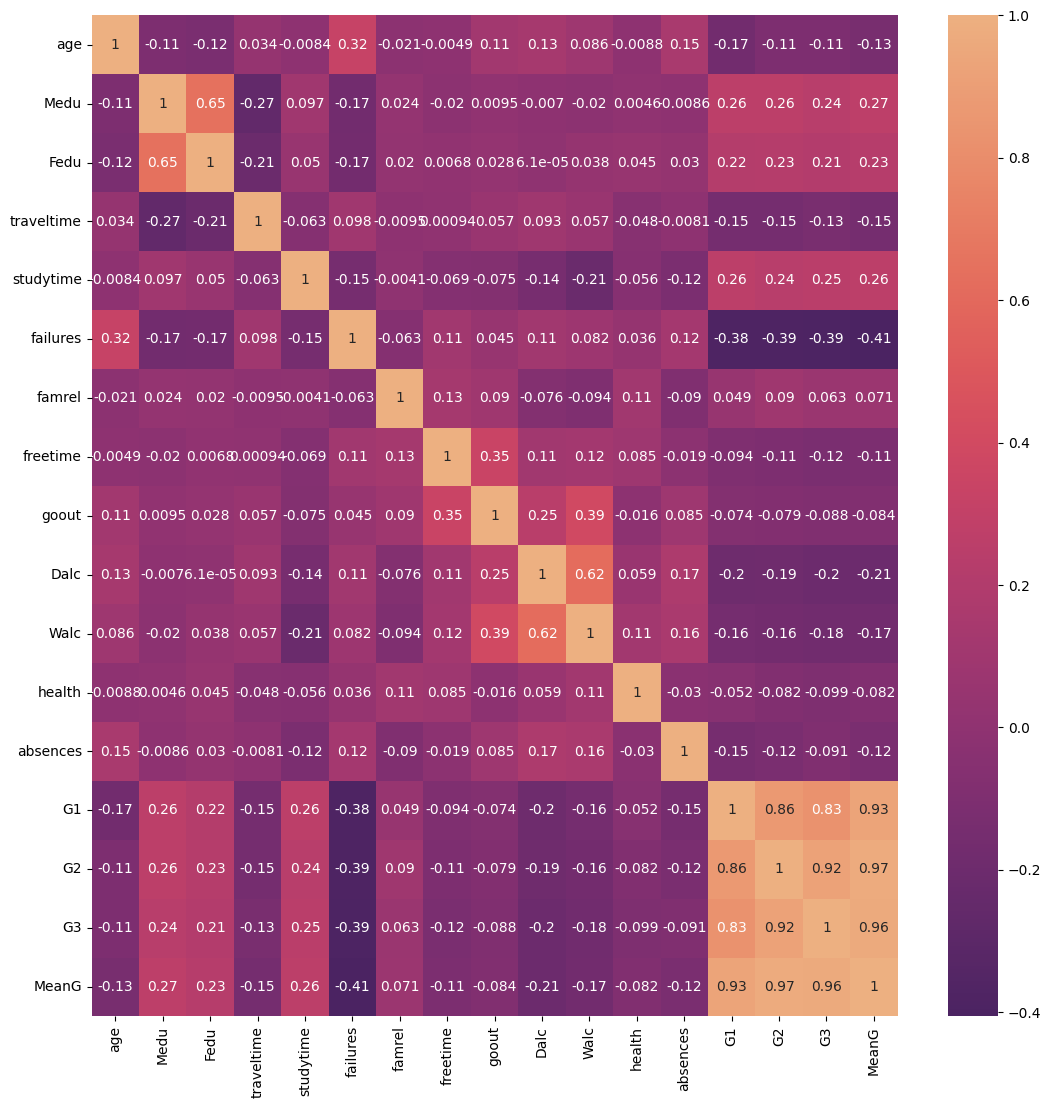

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de cómo cargar tu DataFrame
# data = pd.read_csv('tu_archivo.csv')

# Verificar el tipo de datos de cada columna
print(data.dtypes)

# Seleccionar solo columnas numéricas
data_numeric = data.select_dtypes(include=[float, int])

# Verificar si hay valores faltantes en el DataFrame
print(data_numeric.isnull().sum())

# Eliminar filas con valores faltantes (opcional)
# data_numeric = data_numeric.dropna()

# Crear el heatmap
plt.figure(figsize=(13, 13))
sns.heatmap(data_numeric.corr(), annot=True, cmap="flare_r")
plt.show()


De este mapa de calor encontramos que existe una considerable correlación positiva respecto de las demás con: 
+ `Medu`
+ `Fedu`
+ `studytime`

y una considerable correlación negativa con:
+ `failures`
+ `goout`

Por lo que analizaremos más a profundidad dichas variables


---


